### importing libraries

In [187]:
import tweepy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
import re

### Twitter Credentials

In [188]:
consumer_key = "------YOUR CONSUMER KEY------"
consumer_secret = "------YOUR CONSUMER SECRET KEY-----"
access_token = "-----YOUR ACCESS TOKEN------"
access_token_secret = "----YOUR ACCESS TOKEN SECRET KEY------"

### Authenticating with twitter

In [189]:
authenticate = tweepy.OAuthHandler(consumer_key,consumer_secret)
authenticate.set_access_token(access_token,access_token_secret)

### Creating Twitter API

In [190]:
api = tweepy.API(authenticate,wait_on_rate_limit=True)

### searching for topic

In [191]:
posts = api.search("corona",lang="en",count=100)

In [192]:
# Showing first 5 Tweets
j=1
for tweet in posts[0:5]:
    print(str(j),")",tweet.text)
    j+=1

1 ) RT @BLUEPRINT_Q: Proven by NIH 15 years ago, HCQ prevents and cures early stage corona infection by piercing the cell, enabling Zinc to ent…
2 ) RT @HollywoodKole: @petty_marshall That's because corona snatched all our clocks. Mentally it's still March cause we haven't done any of th…
3 ) @Ilhan That's the Corona death rate. Vote in person!
4 ) RT @DushyantR3: #No_offline_Exam_Gehlot_Ji 
#postponeNEETandJEE 
@LicypriyaK 
@DrRPNishank 
People who have been affect with corona have be…
5 ) RT @clownlito: I wish corona virus started in Las Vegas cuz what happens in Vegas stays in Vegas


### converting tweets into pandas dataframe

In [193]:
data = pd.DataFrame([tweet.text for tweet in posts],columns=["Tweets"])

In [194]:
data.head()

,Tweets
0,"RT @BLUEPRINT_Q: Proven by NIH 15 years ago, H..."
1,RT @HollywoodKole: @petty_marshall That's beca...
2,@Ilhan That's the Corona death rate. Vote in p...
3,RT @DushyantR3: #No_offline_Exam_Gehlot_Ji \n#...
4,RT @clownlito: I wish corona virus started in ...


### cleaning Data

In [195]:
def clean(text):
    text = re.sub(r'@[A-za-z0-9]+','',text)   # Removing Mentions @billgates
    text = re.sub(r'#','',text)        # Removing #Tags
    text = re.sub(r'https?:\/\/\S+','',text)  # Removing Hyper links
    text = re.sub('RT[\s]+','',text)          # Removing RT
    pattern = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
    text=re.sub(pattern,'',text)  #Removing emojis
    return text
data["Tweets"] = data["Tweets"].apply(clean)

In [196]:
data.head()

,Tweets
0,": Proven by NIH 15 years ago, HCQ prevents and..."
1,: That's because corona snatched all our cloc...
2,That's the Corona death rate. Vote in person!
3,: No_offline_Exam_Gehlot_Ji \npostponeNEETandJ...
4,: I wish corona virus started in Las Vegas cuz...


### Getting Polarity

In [197]:
# Getting Polarity
def polarity(text):
    return TextBlob(text).sentiment.polarity
data["Polarity"] = data["Tweets"].apply(polarity)

In [198]:
data.head()

,Tweets,Polarity
0,": Proven by NIH 15 years ago, HCQ prevents and...",0.1
1,: That's because corona snatched all our cloc...,-0.1
2,That's the Corona death rate. Vote in person!,0.0
3,: No_offline_Exam_Gehlot_Ji \npostponeNEETandJ...,0.0
4,: I wish corona virus started in Las Vegas cuz...,0.0


### Getting Subjectivity

In [199]:
# getting subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
data["Subjectivity"] = data["Tweets"].apply(getSubjectivity)

In [200]:
data.head()

,Tweets,Polarity,Subjectivity
0,": Proven by NIH 15 years ago, HCQ prevents and...",0.1,0.3
1,: That's because corona snatched all our cloc...,-0.1,0.2
2,That's the Corona death rate. Vote in person!,0.0,0.0
3,: No_offline_Exam_Gehlot_Ji \npostponeNEETandJ...,0.0,0.0
4,: I wish corona virus started in Las Vegas cuz...,0.0,0.0


### Plotting WordCloud for all the tweets

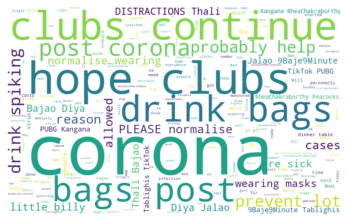

In [201]:
allwords = ' '.join([tweet for tweet in data["Tweets"]])
wordcloud = WordCloud(height=500,width=800,background_color="white").generate(allwords)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

### create a function to compute the Negative , Neutral , Positive Analysis

In [202]:
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
data["Analysis"] = data["Polarity"].apply(analysis)

In [203]:
data.head()

,Tweets,Polarity,Subjectivity,Analysis
0,": Proven by NIH 15 years ago, HCQ prevents and...",0.1,0.3,Positive
1,: That's because corona snatched all our cloc...,-0.1,0.2,Negative
2,That's the Corona death rate. Vote in person!,0.0,0.0,Neutral
3,: No_offline_Exam_Gehlot_Ji \npostponeNEETandJ...,0.0,0.0,Neutral
4,: I wish corona virus started in Las Vegas cuz...,0.0,0.0,Neutral


### printing positive tweets

In [204]:

j=1
sorted_data = data.sort_values(by="Polarity")
for i in range(0,sorted_data.shape[0]):
    if sorted_data["Analysis"][i] == "Positive":
        print(str(j),")",sorted_data["Tweets"][i])
        print('\n')
        j+=1
        

1 ) : Proven by NIH 15 years ago, HCQ prevents and cures early stage corona infection by piercing the cell, enabling Zinc to ent…


2 ) : I was the first to warn about Corona in Telangana assembly in March, now ready to be the voice of voiceless on public iss…


3 ) : After 36 days of struggle finally my dad is back to home...My own Amit shah 
Thank you so much for all the love, wishes…


4 ) : "Manaki raadhu le" is one of the reasons why we have so many cases of Corona right now.


5 ) : Proven by NIH 15 years ago, HCQ prevents and cures early stage corona infection by piercing the cell, enabling Zinc to ent…


6 ) : Get ready for “I would’ve went D1 but corona happened”


7 ) : it’s the way i’ve been in 5 fake relationships since corona starteddddddd what’s my issue LMAO


8 )  Colombia coronavirus COVID-19 report for Sunday, September 6th:

658,456 confirmed cases (+8,401)
21,156 deaths… 


9 ) Lots of good news on the COVID19 front lately:

- only 4.5% of cases required hospitaliza

#### printing Negative Tweets

In [205]:
j=1
for i in range(0,sorted_data.shape[0]):
    if sorted_data["Analysis"][i] == "Negative":
        print(str(j),")",sorted_data["Tweets"][i])
        print("\n")
        j+=1

1 ) :  That's because corona snatched all our clocks. Mentally it's still March cause we haven't done any of th…


2 ) : What's the latest, horrible, outrageous Orange Man Bad scandal for today? Russia collusion didn't work. Impeachment didn'…


3 ) Corona Cases Yesterday - 90k ‍♂️
Highest Ever on a Single Day.. 

SarkaruVaariPaata


4 )  Any sickness with an underlying condition is dangerous. When I got it 3 weeks ago I had no clue. M… 


5 ) : after corona can we PLEASE normalise wearing masks when you’re sick? there is no reason why little billy should be allowed t…


6 ) : after corona can we PLEASE normalise wearing masks when you’re sick? there is no reason why little billy should be allowed t…


7 ) : after corona can we PLEASE normalise wearing masks when you’re sick? there is no reason why little billy should be allowed t…


8 ) : after corona can we PLEASE normalise wearing masks when you’re sick? there is no reason why little billy should be allowed t…


9 )  That's because 

### Plotting the polarity

Text(0.5, 1.0, 'Corona Reaction on Twitter')

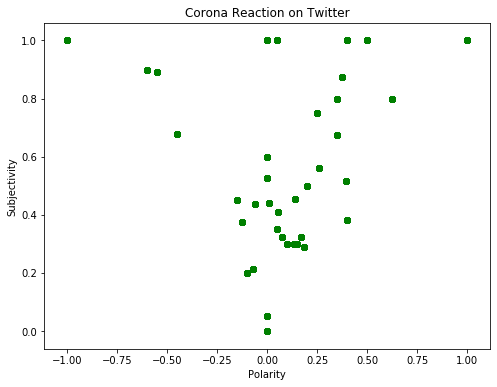

In [206]:
plt.figure(figsize=(8,6))
for i in range(0,data.shape[0]):
    plt.scatter(data["Polarity"],data["Subjectivity"],color="green")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.title("Corona Reaction on Twitter")


### Percentage of positive tweets

In [207]:
positive = data[data["Analysis"] == "Positive"]
positive = positive["Tweets"]
print((positive.shape[0]/data.shape[0])*100)

25.0


### Percentage of Negative Tweets

In [208]:
Negative = data[data["Analysis"] == "Negative"]
Negative = Negative["Tweets"]
print((Negative.shape[0]/data.shape[0])*100)

18.0


### Percentage of Neutral Tweets

In [209]:
Neutral = data[data["Analysis"] == "Neutral"]
Neutral = Neutral["Tweets"]
print((Neutral.shape[0]/data.shape[0])*100)

56.99999999999999


### Overall Reaction 

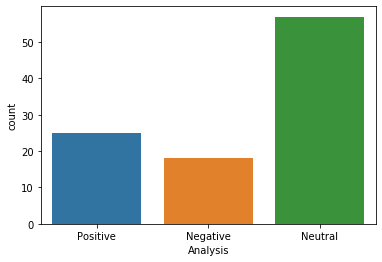

In [210]:
sns.countplot(data["Analysis"])